In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('cleaned_products.csv')



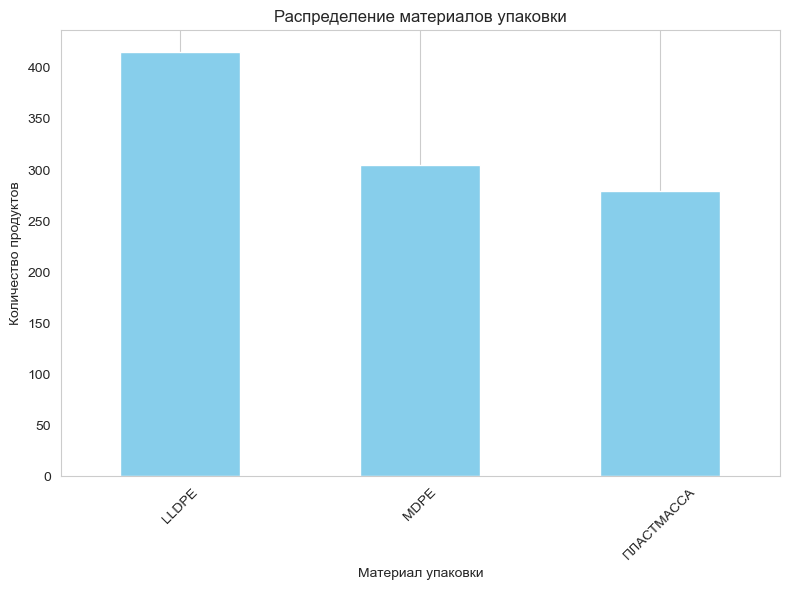

In [2]:
packaging_material_counts = data['DairyProduct_PackagingMaterial'].value_counts()

plt.figure(figsize=(8, 6))
packaging_material_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение материалов упаковки')
plt.xlabel('Материал упаковки')
plt.ylabel('Количество продуктов')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Максимальная температура хранения: 20 °C
Минимальная температура хранения: 0 °C


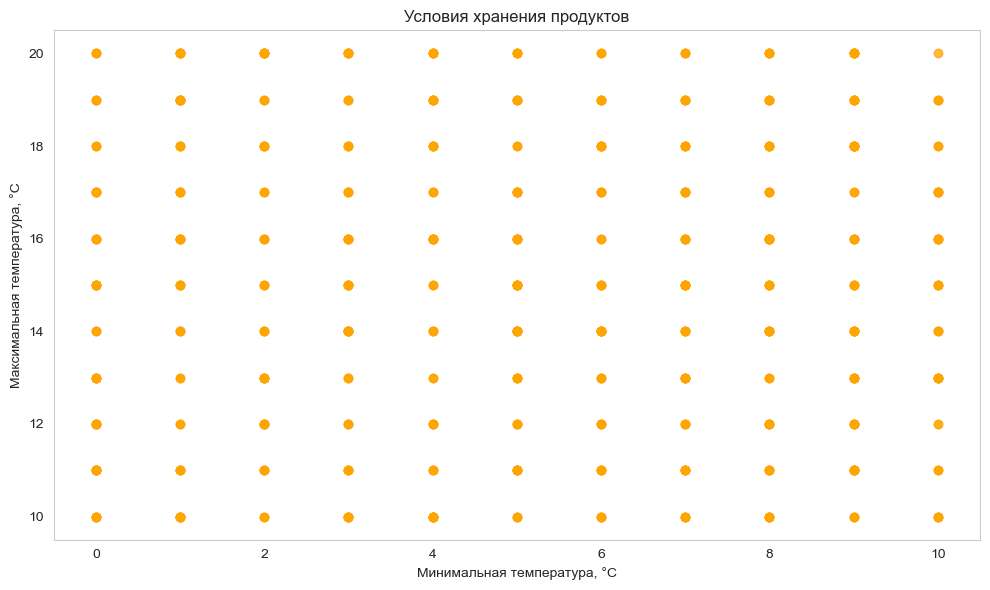

In [3]:
max_storage_temp = data['StorageConditions_MaxStorageTemperature'].max()
min_storage_temp = data['StorageConditions_MinStorageTemperature'].min()

print(f"Максимальная температура хранения: {max_storage_temp} °C")
print(f"Минимальная температура хранения: {min_storage_temp} °C")

plt.figure(figsize=(10, 6))
plt.scatter(data['StorageConditions_MinStorageTemperature'], data['StorageConditions_MaxStorageTemperature'], color='orange', alpha=0.5)
plt.title('Условия хранения продуктов')
plt.xlabel('Минимальная температура, °C')
plt.ylabel('Максимальная температура, °C')
plt.grid()

plt.tight_layout()
plt.show()

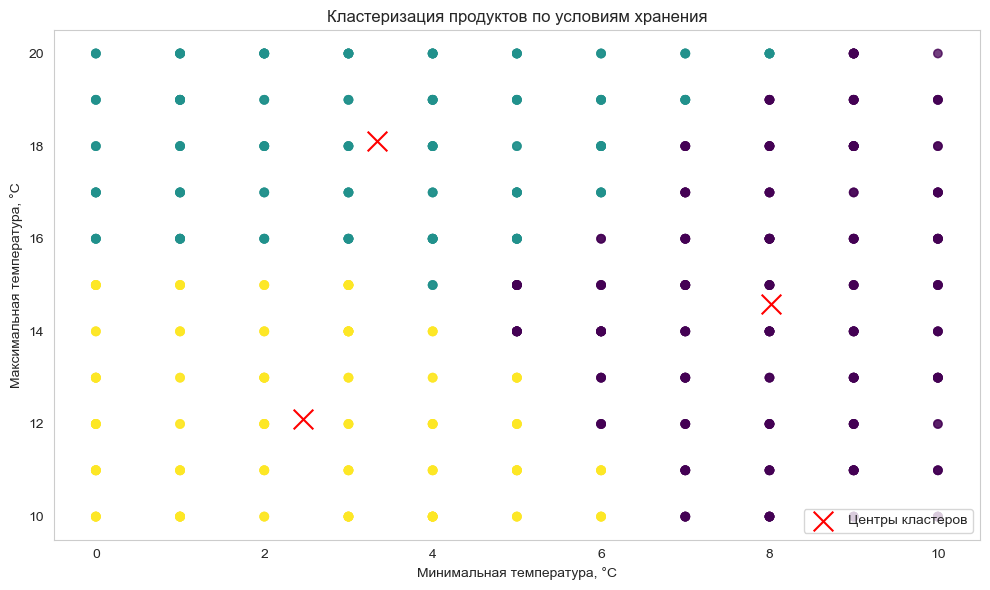

In [4]:
from sklearn.cluster import KMeans

X = data[['StorageConditions_MinStorageTemperature', 'StorageConditions_MaxStorageTemperature']]

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['StorageConditions_MinStorageTemperature'], X['StorageConditions_MaxStorageTemperature'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Кластеризация продуктов по условиям хранения')
plt.xlabel('Минимальная температура, °C')
plt.ylabel('Максимальная температура, °C')
plt.grid()

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Центры кластеров')

plt.legend()
plt.tight_layout()
plt.show()

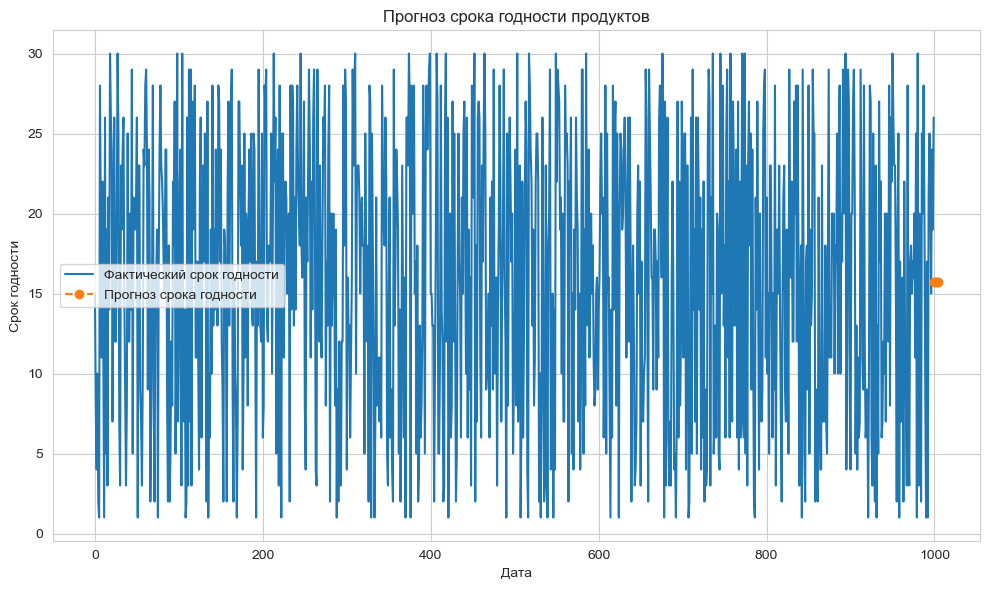

In [14]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(data['StorageConditions_ShelfLife'], order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=5)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['StorageConditions_ShelfLife'], label='Фактический срок годности')
plt.plot(forecast.index, forecast, label='Прогноз срока годности', linestyle='--', marker='o')
plt.title('Прогноз срока годности продуктов')
plt.xlabel('Дата')
plt.ylabel('Срок годности')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

data = pd.read_csv('cleaned_products.csv')

print(data.columns)

if 'ShelfLife' in data.columns:
    shelf_life_data = data['ShelfLife']
    print(shelf_life_data.head())
else:
    print("Column 'ShelfLife' not found in the dataset.")

Index(['DairyProduct_PackagingType', 'Quantity_Value',
       'DairyProduct_IsInfantNutrition', 'SubBrandRu', 'Mass_Net',
       'DairyProduct_ManufacturerTaxIdentifier',
       'DairyProduct_IsUnderVeterinaryControl',
       'DairyProduct_IsShelfLifeUpTo40Days', 'EnergyValueKJ',
       'Manufacturer_Name', 'Provider_Name', 'Mass_Gross', 'GpcClass1',
       'TnvedCode', 'Provider_GLN', 'GpcClass2',
       'StorageConditions_ShelfLifeUnit', 'GpcClass3',
       'DairyProduct_LabelName', 'EnergyValueKcal', 'AdditionalInfoRu',
       'DairyProduct_ProteinContent', 'DairyProduct_FatContent',
       'DairyProduct_PackagingMaterial', 'DairyProduct_ManufacturerCountry',
       'Carbohydrates', 'DairyProduct_RawMaterialOrigin',
       'StorageConditions_MaxRelativeHumidity',
       'DairyProduct_IsMedicalOrSpecialDiet', 'StorageConditions_ShelfLife',
       'DairyProduct_Type', 'StorageConditions_MaxStorageTemperature',
       'BrandRu', 'FunctionNameRu', 'Protein',
       'StorageConditions_Mi